In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
from torch.autograd import Variable

import os, sys, random
from pathlib import Path
import glob

from tqdm import tqdm
from fastprogress import progress_bar

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
CUR_DIR = Path.cwd()
DATA_DIR = CUR_DIR / 'data/preprocessed'
DATA_DIR

WindowsPath('C:/Users/안현준/풍년보험/data/preprocessed')

In [4]:
df = pd.read_csv(f'{str(DATA_DIR)}/summary.csv', encoding='utf-8')
df

,연월,감자,고구마,고추(화건),깻잎,녹두(국산),단감,당근(무세척),대파,들깨(국산),...,양배추,양파,오이(가시),적상추,참외,콩(흰콩국산),토마토,팥(국산),포도(캠벨),풋고추
0,2001_1,12191.0,8348.0,224565.0,16365.0,237774.0,14214.000000,9313.0,855.0,171565.0,...,3186.0,13734.0,20007.0,8772.0,18722.666667,101957.0,8916.333333,147000.0,4490.857143,33783.0
1,2001_2,11558.0,9567.0,231208.0,12367.0,241875.0,16394.000000,10258.0,645.0,173458.0,...,2747.0,14062.0,23917.0,8510.0,35444.333333,95875.0,15831.666667,147875.0,6980.714286,58408.0
2,2001_3,11885.0,13990.0,231962.0,10785.0,242000.0,21579.000000,11277.0,669.0,183885.0,...,2783.0,14422.0,19942.0,6909.0,52166.000000,93885.0,22747.000000,147154.0,9470.571429,60646.0
3,2001_4,12133.0,14367.0,230333.0,8813.0,239833.0,21671.000000,13658.0,528.0,198375.0,...,2574.0,8752.0,13074.0,5284.0,39989.000000,91575.0,19756.000000,147000.0,11960.428571,24283.0
4,2001_5,22625.0,13594.0,238083.0,7533.0,238000.0,23043.400000,14900.0,803.0,199125.0,...,2913.0,5150.0,9236.0,4828.0,21800.000000,89142.0,13583.000000,147000.0,14450.285714,22025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2020_8,32806.0,55765.0,692489.0,37550.0,463910.0,37260.285714,45977.0,3081.0,488530.0,...,9079.0,20492.0,32260.0,49308.0,49751.000000,184790.0,29638.000000,355400.0,23571.000000,51334.0
236,2020_9,35413.0,38834.0,871229.0,35653.0,498295.0,36936.142857,70528.0,3178.0,527714.0,...,13033.0,23636.0,35076.0,30401.0,70438.000000,188171.0,50354.000000,365095.0,21720.000000,92749.0
237,2020_10,34283.0,33565.0,812179.0,22075.0,542379.0,36612.000000,66874.0,3019.0,571126.0,...,17068.0,23749.0,15384.0,11982.0,64834.500000,189516.0,50018.000000,382979.0,20284.000000,63283.0
238,2020_11,35830.0,36263.0,824724.0,18950.0,586057.0,32381.000000,42214.0,2982.0,606486.0,...,12744.0,25540.0,20919.0,11180.0,59231.000000,203514.0,35261.000000,453448.0,21071.333333,49019.0


In [5]:
crops = df.columns[1:]
crops

Index(['감자', '고구마', '고추(화건)', '깻잎', '녹두(국산)', '단감', '당근(무세척)', '대파', '들깨(국산)',
       '딸기', '무', '미나리', '방울토마토', '배(신고)', '배추', '백참깨(국산)', '복숭아(백도)',
       '사과(후지)', '생강(국산)', '수박', '시금치', '애호박', '양배추', '양파', '오이(가시)', '적상추',
       '참외', '콩(흰콩국산)', '토마토', '팥(국산)', '포도(캠벨)', '풋고추'],
      dtype='object')

In [6]:
total_years = list(df['연월'])
total_years

['2001_1',
 '2001_2',
 '2001_3',
 '2001_4',
 '2001_5',
 '2001_6',
 '2001_7',
 '2001_8',
 '2001_9',
 '2001_10',
 '2001_11',
 '2001_12',
 '2002_1',
 '2002_2',
 '2002_3',
 '2002_4',
 '2002_5',
 '2002_6',
 '2002_7',
 '2002_8',
 '2002_9',
 '2002_10',
 '2002_11',
 '2002_12',
 '2003_1',
 '2003_2',
 '2003_3',
 '2003_4',
 '2003_5',
 '2003_6',
 '2003_7',
 '2003_8',
 '2003_9',
 '2003_10',
 '2003_11',
 '2003_12',
 '2004_1',
 '2004_2',
 '2004_3',
 '2004_4',
 '2004_5',
 '2004_6',
 '2004_7',
 '2004_8',
 '2004_9',
 '2004_10',
 '2004_11',
 '2004_12',
 '2005_1',
 '2005_2',
 '2005_3',
 '2005_4',
 '2005_5',
 '2005_6',
 '2005_7',
 '2005_8',
 '2005_9',
 '2005_10',
 '2005_11',
 '2005_12',
 '2006_1',
 '2006_2',
 '2006_3',
 '2006_4',
 '2006_5',
 '2006_6',
 '2006_7',
 '2006_8',
 '2006_9',
 '2006_10',
 '2006_11',
 '2006_12',
 '2007_1',
 '2007_2',
 '2007_3',
 '2007_4',
 '2007_5',
 '2007_6',
 '2007_7',
 '2007_8',
 '2007_9',
 '2007_10',
 '2007_11',
 '2007_12',
 '2008_1',
 '2008_2',
 '2008_3',
 '2008_4',
 '2008_5',


In [7]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length - 1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [8]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [9]:
SEED = 42
def fix_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
fix_seed(SEED)

In [10]:
def make_single_directory(path):
    os.makedirs(f'{path}', exist_ok=True)

In [11]:
def save_result(model, X, y, crop_name, path):
    model.eval()
    y_pred = model(X).data.numpy()
    y_true = y.data.numpy()
    
    y_pred = scaler.inverse_transform(y_pred)
    y_true = scaler.inverse_transform(y_true)
    
    
    # plot the results
    years = total_years[seq_length + 1:]
    y_true = y_true.ravel()
    y_pred = y_pred.ravel()
    
    plt.axvline(x=train_size, c='r', linestyle='--')
    plt.plot(y_true, label='true', color='black', alpha=0.7)
    plt.plot(y_pred, label='pred', color='#5392cd')
    
    year_ticks = []
    for i, year in enumerate(years):
        if i == 0 or i == len(years) - 1:
            year_ticks.append(year)
        if year[-2:] == '_1': 
            year_ticks.append(year)
        else: 
            year_ticks.append('')
            
    plt.tick_params(bottom=False)
    plt.xticks(
        np.arange(0, len(year_ticks)),
        year_ticks,
        rotation=90
    )

    plt.title(crop_name, fontsize=16)
    plt.legend(prop={'size': 14})
    plt.savefig(f'{path}/prices_{crop_name}.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.clf()
    
    #print(len(years[seq_length + 1:]))
    
    # save as CSV file
    df = pd.DataFrame({
        '연월': years,
        f'{crop_name}_true': y_true,
        f'{crop_name}_pred': y_pred,
    })
    df.to_csv(f'{path}/predicts_{crop_name}.csv', encoding='utf-8', index=False)

Crop Name: 감자


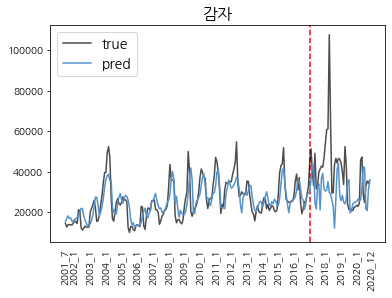

Crop Name: 고구마


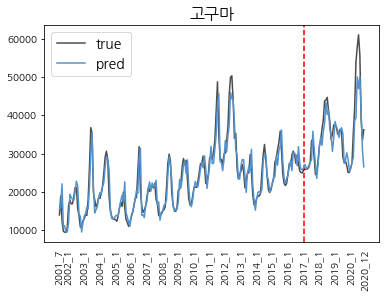

Crop Name: 고추(화건)


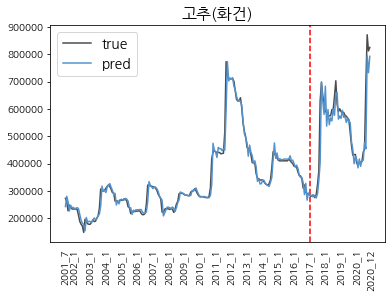

Crop Name: 깻잎


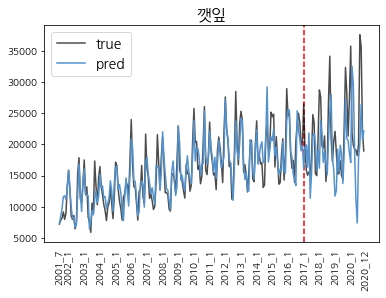

Crop Name: 녹두(국산)


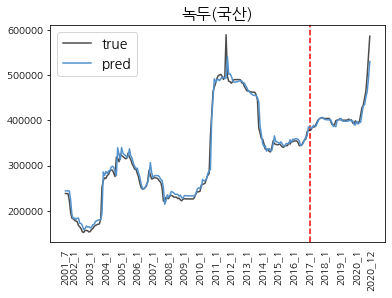

Crop Name: 단감


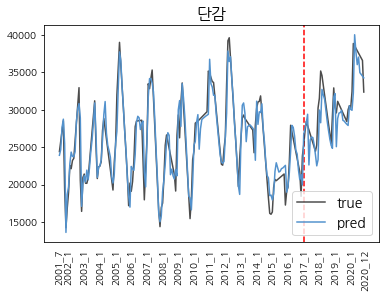

Crop Name: 당근(무세척)


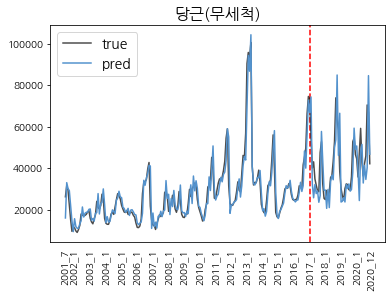

Crop Name: 대파


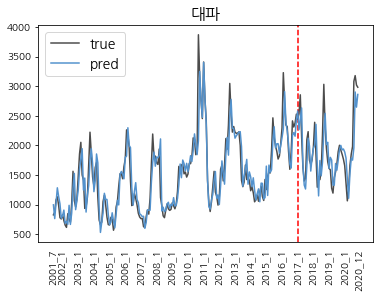

Crop Name: 들깨(국산)


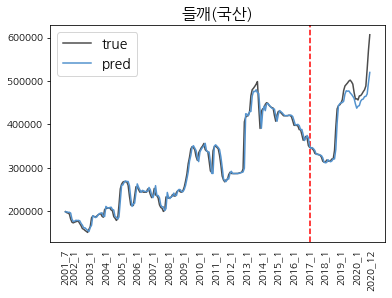

Crop Name: 딸기


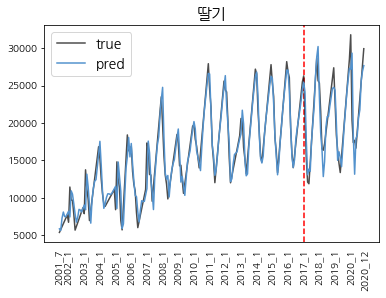

Crop Name: 무


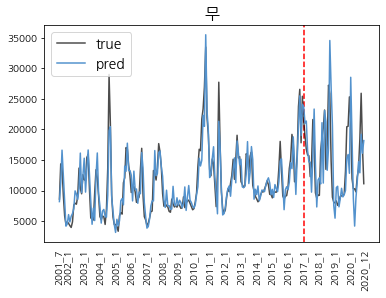

Crop Name: 미나리


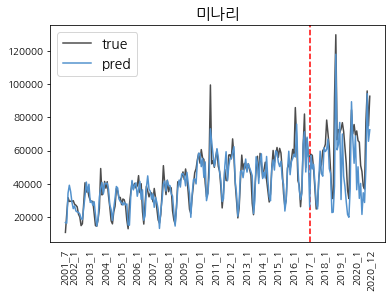

Crop Name: 방울토마토


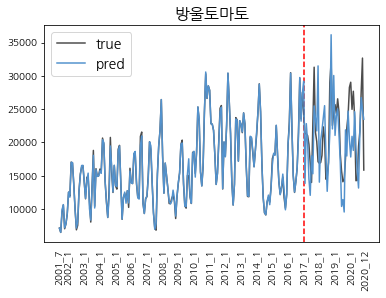

Crop Name: 배(신고)


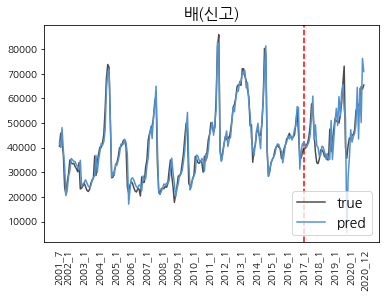

Crop Name: 배추


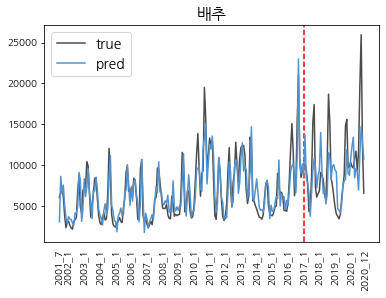

Crop Name: 백참깨(국산)


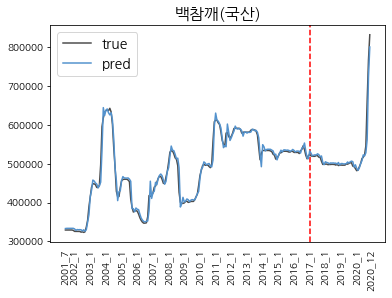

Crop Name: 복숭아(백도)


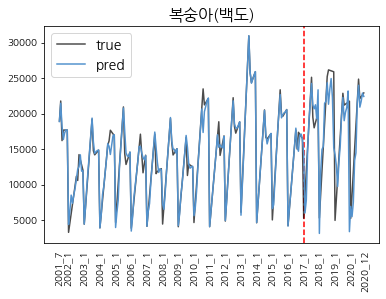

Crop Name: 사과(후지)


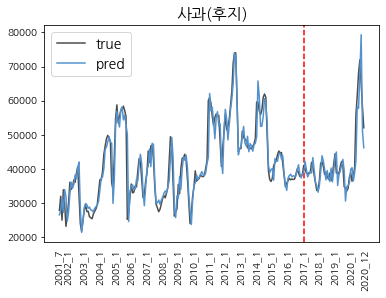

Crop Name: 생강(국산)


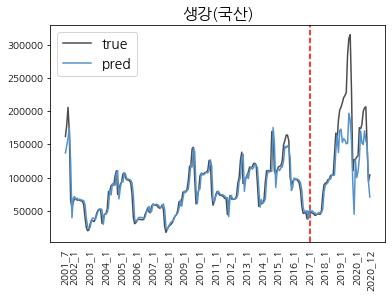

Crop Name: 수박


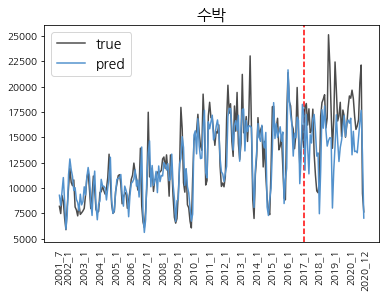

Crop Name: 시금치


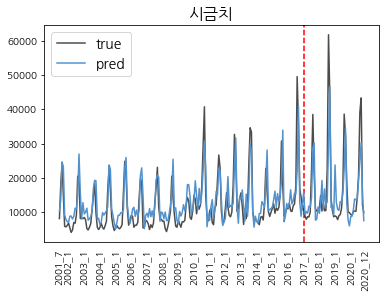

Crop Name: 애호박


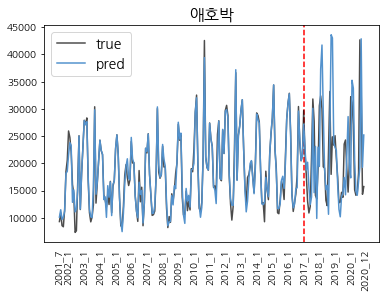

Crop Name: 양배추


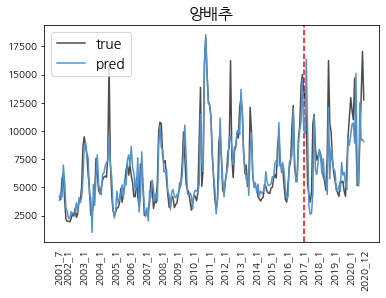

Crop Name: 양파


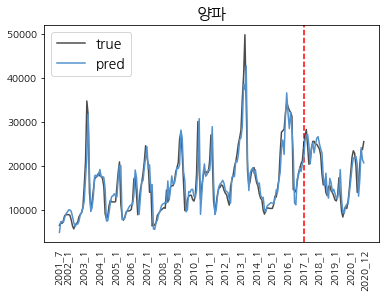

Crop Name: 오이(가시)


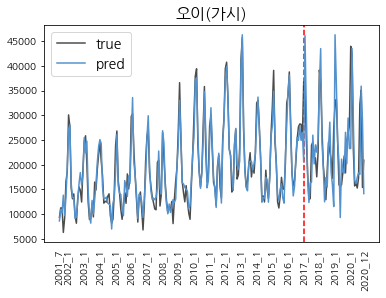

Crop Name: 적상추


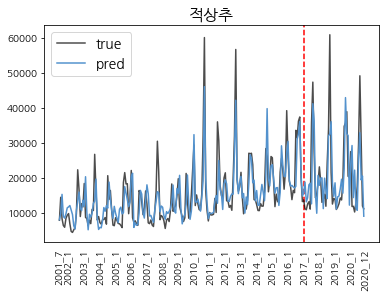

Crop Name: 참외


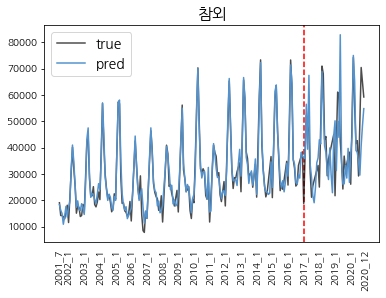

Crop Name: 콩(흰콩국산)


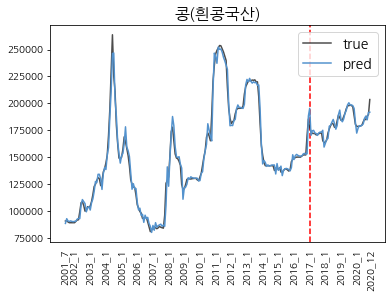

Crop Name: 토마토


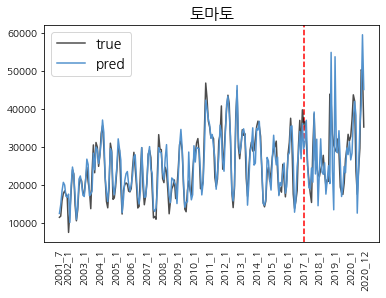

Crop Name: 팥(국산)


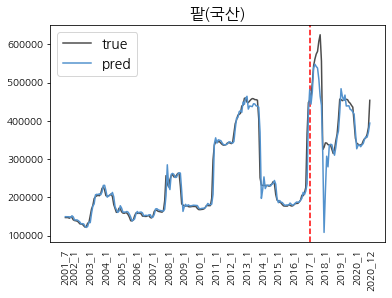

Crop Name: 포도(캠벨)


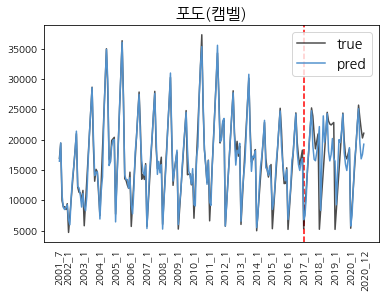

Crop Name: 풋고추


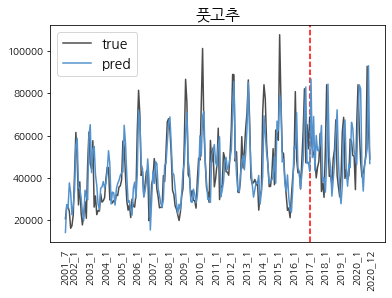

<Figure size 432x288 with 0 Axes>

In [132]:
scaler = MinMaxScaler(feature_range=(-1, 1))
seq_length = 5

fix_seed(SEED)

for i, crop in enumerate(progress_bar(crops)):
    print(f'Crop Name: {crop}')
    path = f'./results/{crop}'
    make_single_directory(path)
    
    # construct the data
    selected_data = scaler.fit_transform(df.iloc[:, i+1:i+2].values)
    X, y = sliding_windows(selected_data, seq_length)
    X = torch.Tensor(np.array(X))
    y = torch.Tensor(np.array(y))
    train_size = int(len(y) * 0.8)
    
    # load the model and infer
    best_model = torch.load(f'{path}/model_{crop}.pt')
    save_result(best_model, X, y, crop, path)

Crop Name: 고구마


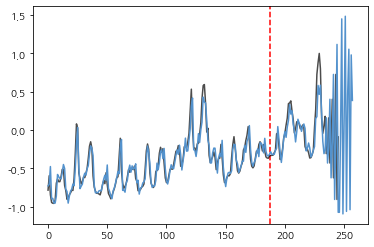

In [65]:
def save_result_v2(model, data, crop_name, path):
    model.eval()
    X, y = sliding_windows(data, seq_length)
    X = torch.Tensor(np.array(X))
    y = torch.Tensor(np.array(y))
    y_preds = model(X).data.numpy()
    y_trues = y.data.numpy()
    
    
    for p_month in range(12):
        #print(data.shape)
        X, y = sliding_windows(data[-(seq_length+2):], seq_length)
        X = torch.Tensor(np.array(X))
        y = torch.Tensor(np.array(y))
        #print(X.shape, y.shape)

        y_pred = best_model(X).data.numpy()
        y_preds = np.append(y_preds, y_pred)
        y_true = y.data.numpy()
        #print(y_pred.shape)
        #print(y_pred)
        data = np.append(data, y_pred, axis=0)
        #print(y_pred.shape)
    
    plt.axvline(x=train_size, c='r', linestyle='--')
    plt.plot(y_trues, label='true', color='black', alpha=0.7)
    plt.plot(y_preds, label='pred', color='#5392cd')
    plt.show()
    return


scaler = MinMaxScaler(feature_range=(-1, 1))
seq_length = 5

fix_seed(SEED)

for i, crop in enumerate(progress_bar(crops)):
    if crop == '감자':
        continue
    print(f'Crop Name: {crop}')
    path = f'./results/{crop}'
    make_single_directory(path)
    
    # construct the data
    selected_data = scaler.fit_transform(df.iloc[:, i+1:i+2].values)
    X, y = sliding_windows(selected_data, seq_length)
    X = torch.Tensor(np.array(X))
    y = torch.Tensor(np.array(y))
    train_size = int(len(y) * 0.8)
    
    # load the model and infer
    best_model = torch.load(f'{path}/model_{crop}.pt')
    save_result_v2(best_model, data, crop, path)
    break

In [102]:
data = scaler.fit_transform(df.iloc[:, i+1:i+2].values)
print(data.shape)

X, y = sliding_windows(data, seq_length)
X = torch.Tensor(np.array(X))
y = torch.Tensor(np.array(y))
print(X.shape, y.shape)

y_pred = best_model(X).data.numpy()
y_true = y.data.numpy()
y_pred.shape
y_pred

(240, 1)
torch.Size([234, 5, 1]) torch.Size([234, 1])


array([[-0.7292658 ],
       [-0.7082372 ],
       [-0.47694463],
       [-0.8988462 ],
       [-0.8923438 ],
       [-0.9539816 ],
       [-0.9536806 ],
       [-0.8620193 ],
       [-0.58025175],
       [-0.61088085],
       [-0.6303262 ],
       [-0.6378352 ],
       [-0.5510791 ],
       [-0.45035166],
       [-0.5013991 ],
       [-0.772378  ],
       [-0.80245316],
       [-0.9542472 ],
       [-0.8638408 ],
       [-0.797627  ],
       [-0.7729799 ],
       [-0.70657   ],
       [-0.7270741 ],
       [-0.5086469 ],
       [-0.18378565],
       [ 0.03471902],
       [-0.49118757],
       [-0.7652295 ],
       [-0.7328487 ],
       [-0.70636016],
       [-0.6115936 ],
       [-0.5638632 ],
       [-0.5891828 ],
       [-0.50584733],
       [-0.4629709 ],
       [-0.30971694],
       [-0.20638752],
       [-0.2383244 ],
       [-0.33197433],
       [-0.71666723],
       [-0.8198129 ],
       [-0.81432164],
       [-0.82035875],
       [-0.7938489 ],
       [-0.7896678 ],
       [-0

In [103]:
y_pred[-1]

array([-0.3085106], dtype=float32)

(187, 1)
(188, 1)
(189, 1)
(190, 1)
(191, 1)
(192, 1)
(193, 1)
(194, 1)
(195, 1)
(196, 1)
(197, 1)
(198, 1)
(199, 1)


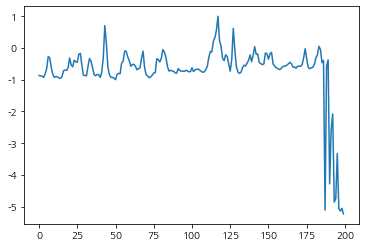

In [123]:
i = 10
data = scaler.fit_transform(df.iloc[:, i+1:i+2].values)
data = data[:train_size]
print(data.shape)
data = np.append(data, [y_pred[-1]], axis=0)
for p_month in range(12):
    print(data.shape)
    X, y = sliding_windows(data, seq_length)
    X = torch.Tensor(np.array(X))
    y = torch.Tensor(np.array(y))
    #print(X.shape, y.shape)

    y_pred = best_model(X).data.numpy()
    y_true = y.data.numpy()
    #print(y_pred.shape)
    #print(y_pred)
    if y_pred[-1] <= -1
    data = np.append(data, [y_pred[-1]], axis=0)
plt.plot(data)

In [124]:
i = 10
raw = scaler.fit_transform(df.iloc[:, i+1:i+2].values)
X, y = sliding_windows(data, seq_length)
X[0], y[0]

(array([[-0.87013246],
        [-0.88009162],
        [-0.88527039],
        [-0.92789563],
        [-0.81728248]]),
 array([-0.65056601]))

In [125]:
X[0].shape

(5, 1)

In [126]:
X_in = torch.Tensor(X[0]).view(-1, seq_length, 1)
y_pred = best_model(X_in).data.numpy()
y_pred

array([[-0.71620274]], dtype=float32)